In [3]:
ls -d data*

data_2013_2d_asbuilt_impaired_0.61m/
data_2013-2d-slr0ft-v04/
data_2013-2d-slr0ft-v05/
data_2013-2d-slr0ft-v05a/
data_2013-2d-slr0ft-v06/
data_2013-2d-slr0ft-v07/
data_2013-2d-slr0ft-v08/
data_2013-2d-slr0ft-v09/
data_2013-2d-slr0ft-v10/
data_2013-2d-slr0ft-v11/
data_2013-2d-slr0ft-v11nobmi/
data_2013-2d-slr0ft-v12nobmi/
data_2013-2d-slr0ft-v13/
data_2013-2d-slr0ft-v13r/
data_2013-2d-slr0ft-v14/
data_2013-2d-slr2ft-v00/
data_2013-2d-slr2ft-v01/
data_2013-2d-slr2ft-v02/
data_2013-2d-slr2ft-v03/
data_2013-2d-slr2ft-v14/
data_2013-2d-v00/
data_2016_2d_asbuilt_impaired_scen1/
data_2016_2d_asbuilt_impaired_scen2/
data_2016_2d_asbuilt_impaired_scen3/
data-2016-3d-asbuilt-impaired-v06/
data_evap_v001/
data_evap_v002/
data_highflow_v019/
data_mouth_v009/
data_mouth_v019/
data_salt_filling-v02/
data_salt_filling-v03/
data_salt_filling-v04_asbuilt_impaired/
data_salt_filling-v04_asbuilt_unimpaired/
data_salt_filling-v04_existing_impaired/
data_salt_filling-v04_existing_unimpaired/
data_salt_fill

In [42]:
import stompy.model.delft.dflow_model as dfm
import numpy as np
import pandas as pd
import xarray as xr
import os
import six
import matplotlib.pyplot as plt
%matplotlib notebook

In [43]:
six.moves.reload_module(dfm)

<module 'stompy.model.delft.dflow_model' from '/home/rustyh/src/stompy/stompy/model/delft/dflow_model.py'>

In [13]:
fig_dir="fig-scenarios-20220317"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [31]:
# Start with 2D runs
runs=pd.DataFrame(dict(run_dir=[# RUNNING 'data_2016_2d_asbuilt_impaired_scen1',
                                'data_2016_2d_asbuilt_impaired_scen1',
                                'data_2016_2d_asbuilt_impaired_scen2',
                                'data_2016_2d_asbuilt_impaired_scen3'],
                       name=['Low','Medium','High']))


In [44]:
runs['model']=runs.run_dir.apply(lambda rd: dfm.DFlowModel.load(rd))

In [45]:
runs['his']=runs.model.apply(lambda mod: mod.his_dataset())

Some lines are degenerate
Some lines are degenerate
node_coordinates cross_section_geom_node_coordx cross_section_geom_node_coordy do not exist


Preliminary 2D plots:

First step is to verify that the scenarios are working as planned.
 - time series of waterlevel at key locations
 
Second step is to go through the analyses in the scope:
 - which can be handled in 2D
 - do any require more output than is currently configured?
 


In [46]:
stage_stations=[ ['thalweg_pesc_0000','Ocean'],
                 ['nck','Lagoon'],
                 ['pch_up','Culverts (N)'],
                 ['nmp','North Marsh Panne'],
                 ['npc','Ped. Bridge']]

In [47]:
def fig_waterlevel_timeseries(rec):
    fig,ax=plt.subplots(1,1,figsize=(7.5,4))

    for station,name in stage_stations:
        ax.plot(rec['his'].time,
                rec['his'].waterlevel.sel(stations=station),
                label=name)

    ax.legend(loc='upper left',bbox_to_anchor=[1.03,1])
    fig.subplots_adjust(right=0.72,left=0.1,top=0.98)
    ax.set_ylabel('Stage (m)')
    ax.text(0.03,0.97,rec['name'],transform=ax.transAxes,ha='left',va='top')

<IPython.core.display.Javascript object>


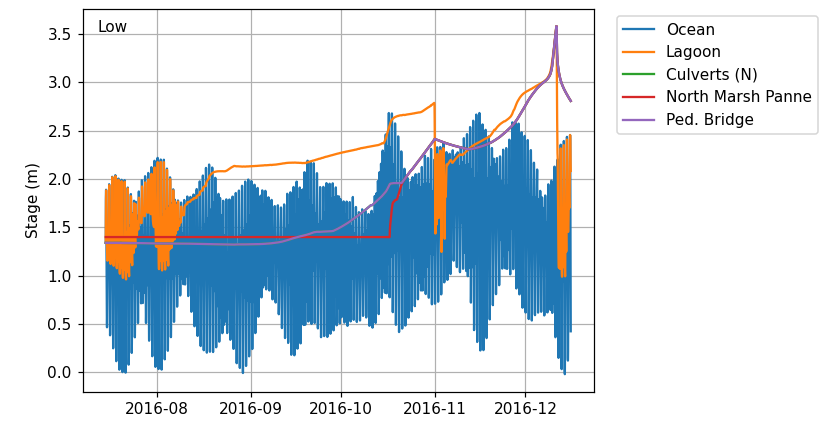

<IPython.core.display.Javascript object>


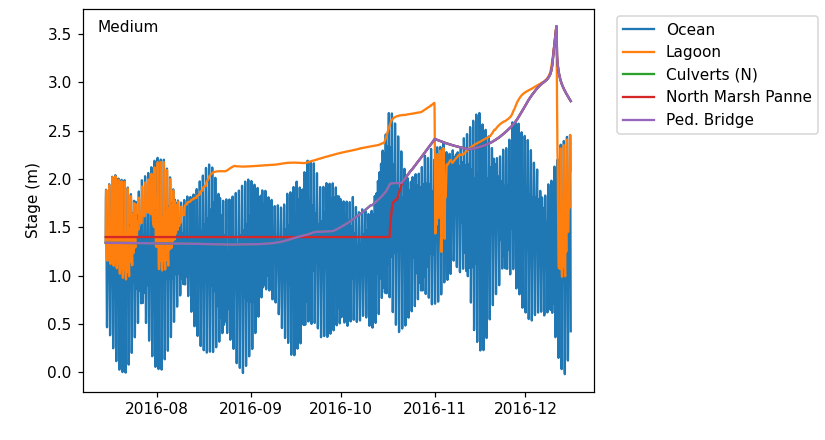

<IPython.core.display.Javascript object>


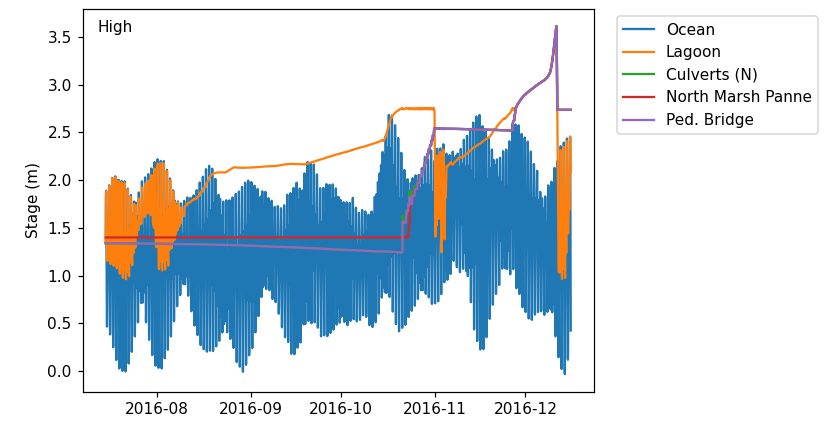

In [49]:
for _,rec in runs.iterrows():
    fig_waterlevel_timeseries(rec) 
